In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from aind_hcr_data_loader.tile_data import TileData
import aind_hcr_qc.tile_alignment as ta

# notebook reload
%load_ext autoreload
%autoreload 2

## Choose bigstitcher xml

In [7]:
save_dir = Path(f'/root/capsule/scratch/dev-plots')
bucket_name = "aind-open-data"

In [19]:
xml_path = "./bigstitcher.xml"
stitched_xml = ta.parse_bigstitcher_xml(xml_path)

stitched_xml["dataset_path"] = stitched_xml["dataset_path"]
stitched_xml["tile_names"]

Dataset path: HCR_788639-25_2025-06-06_13-00-00_processed_2025-06-17_07-08-14/corrected.ome.zarr/
405: n=9


{62: 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
 63: 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr',
 64: 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr',
 72: 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr',
 73: 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr',
 74: 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr',
 82: 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr',
 83: 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr',
 84: 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr'}

In [20]:
stitched_xml

{'tile_names': {62: 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  63: 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr',
  64: 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr',
  72: 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr',
  73: 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr',
  74: 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr',
  82: 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr',
  83: 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr',
  84: 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr'},
 'tile_transforms': {62: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -7296.0 0.0 0.0 1.0 0.0'}],
  63: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -5471.0 0.0 0.0 1.0 0.0'}],
  64: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -3648.0 0.0 0.0 1.0 0.0'}],
  72: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 4560.0 0.0 1.0

## Check adjacent tile pairs

In [21]:
# adjacent pairs
pairs = ta.get_all_adjacent_pairs(stitched_xml["tile_names"], 
                                  include_diagonals=False)

print(f"Found {len(pairs)} adjacent pairs")
print("First two pairs:")
pairs[0:2]

Found 12 adjacent pairs
First two pairs:


[('Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr'),
 ('Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr')]

## Create PairedTile instance

In [22]:
pair_n = 1
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3

paired_tiles = ta.create_paired_tiles(
    data=stitched_xml,  
    tile1_name=tile1_name, 
    tile2_name=tile2_name,
    bucket_name=bucket_name,
    pyramid_level=pyramid_level
)


/opt/conda/lib/python3.10/site-packages/fsspec/registry.py:294: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0007_Y_0002_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Getting net transforms for tile: Tile_X_0006_Y_0002_Z_0000_ch_405.zarr
Available tile names: ['Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr']
Getting net transforms for tile: Tile_X_0007_Y_0002_Z_0000_ch_405.zarr
Available tile names: ['Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr', 'Tile

In [23]:
paired_tiles.composite.shape

(466, 238, 170, 3)

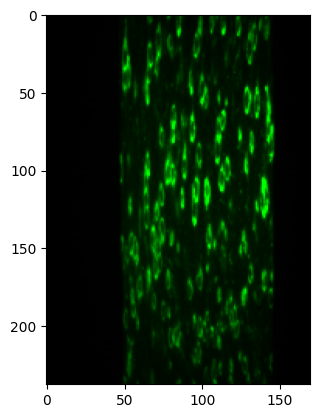

In [24]:
plt.imshow(paired_tiles.composite[238,:,:,:])

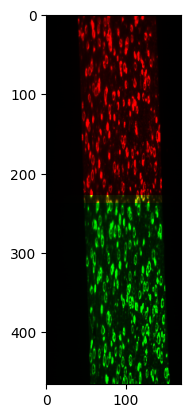

In [26]:
plt.imshow(paired_tiles.composite[:,100,:,:])

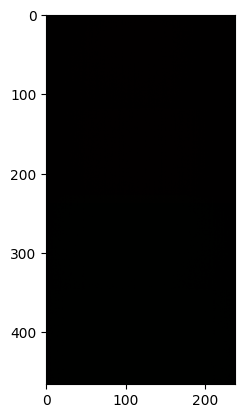

In [28]:
plt.imshow(paired_tiles.composite[:,:,34,:])

# Plot tile overlap

In [93]:
stitched_xml

{'tile_names': {62: 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  63: 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr',
  64: 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr',
  72: 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr',
  73: 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr',
  74: 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr',
  82: 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr',
  83: 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr',
  84: 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr'},
 'tile_transforms': {62: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -7296.0 0.0 0.0 1.0 0.0'}],
  63: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -5471.0 0.0 0.0 1.0 0.0'}],
  64: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -3648.0 0.0 0.0 1.0 0.0'}],
  72: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 4560.0 0.0 1.0

Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Composite dimensions: 81x537

Placement coordinates:
Tile 1: y=30, x=0, shape=(477, 51)
Tile 2: y=30, x=30, shape=(477, 51)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Composite dimensions: 81x537

Placement coordinates:
Tile 1: y=30, x=0, shape=(477, 51)
Tile 2: y=30, x=30, shape=(477, 51)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape 

/src/aind-hcr-qc/src/aind_hcr_qc/tile_alignment.py:1234: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  tile2_name, ch2 = parse_tile_name(tile2.tile_name)


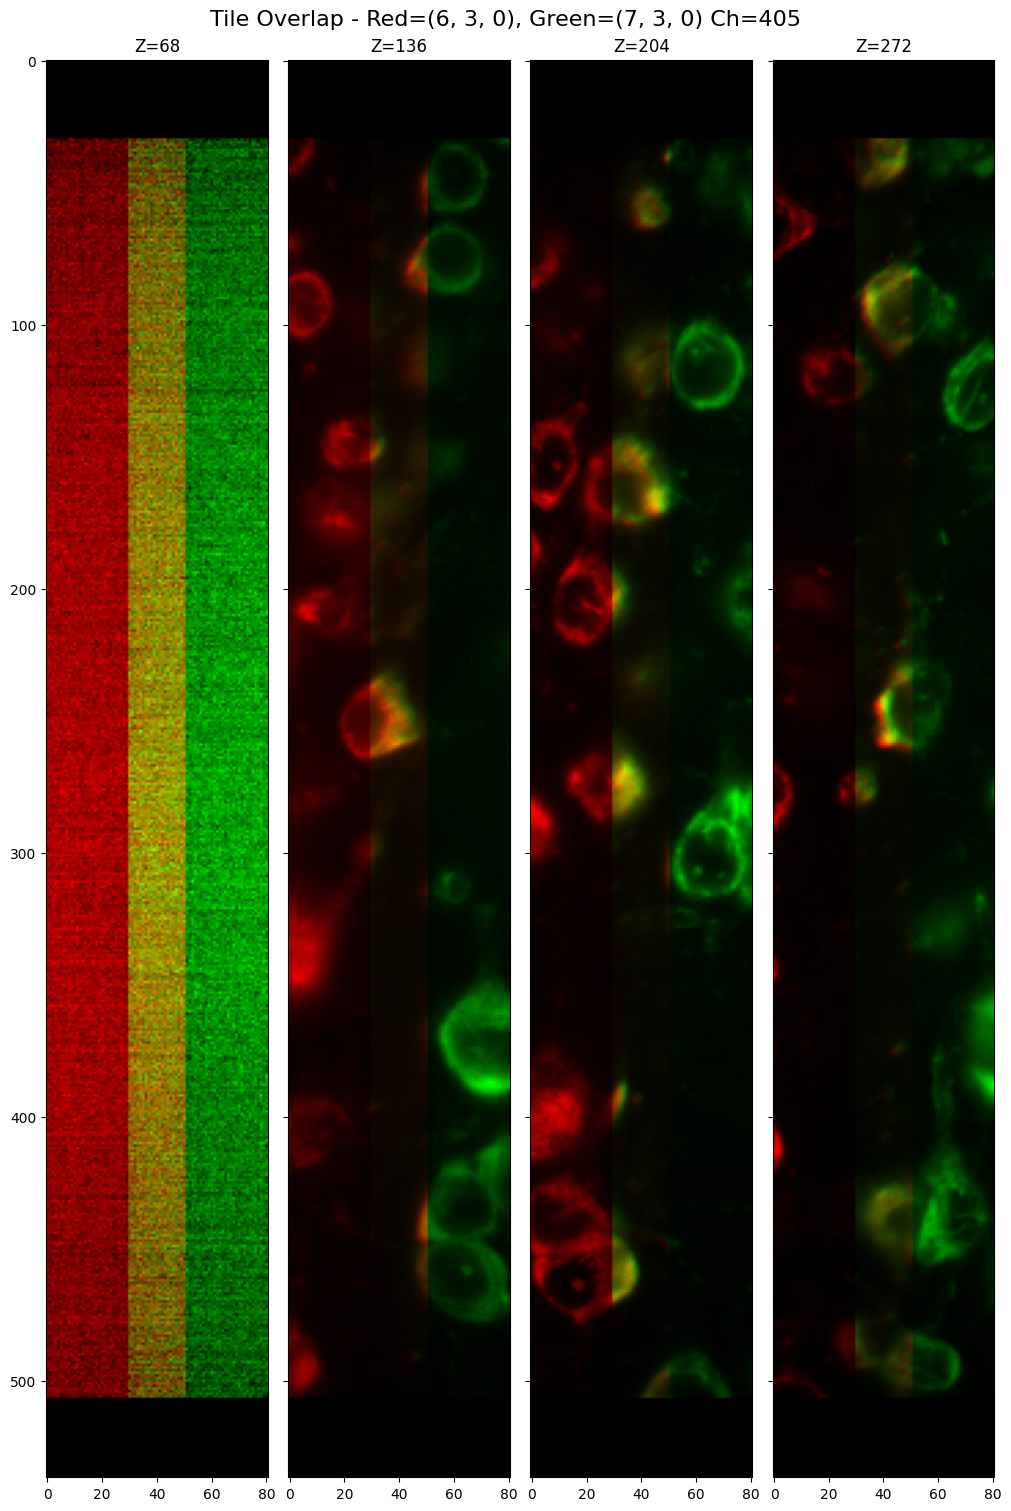

In [107]:
ta.figure_tile_overlap_4_slices(pairs[pair_n][0], 
                                pairs[pair_n][1],
                                stitched_xml, 
                                pyramid_level=pyramid_level)

Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0007_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0007_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Composite dimensions: 143x1055

Placement coordinates:
Tile 1: y=50, x=0, shape=(955, 93)
Tile 2: y=50, x=50, shape=(955, 93)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0007_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Composite dimensions: 143x1055

Placement coordinates:
Tile 1: y=50, x=0, shape=(955, 93)
Tile 2: y=50, x=50, shape=(955, 93)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0007_Y_0004_Z_0000_ch_638.zarr at pyramid level 1 with sh

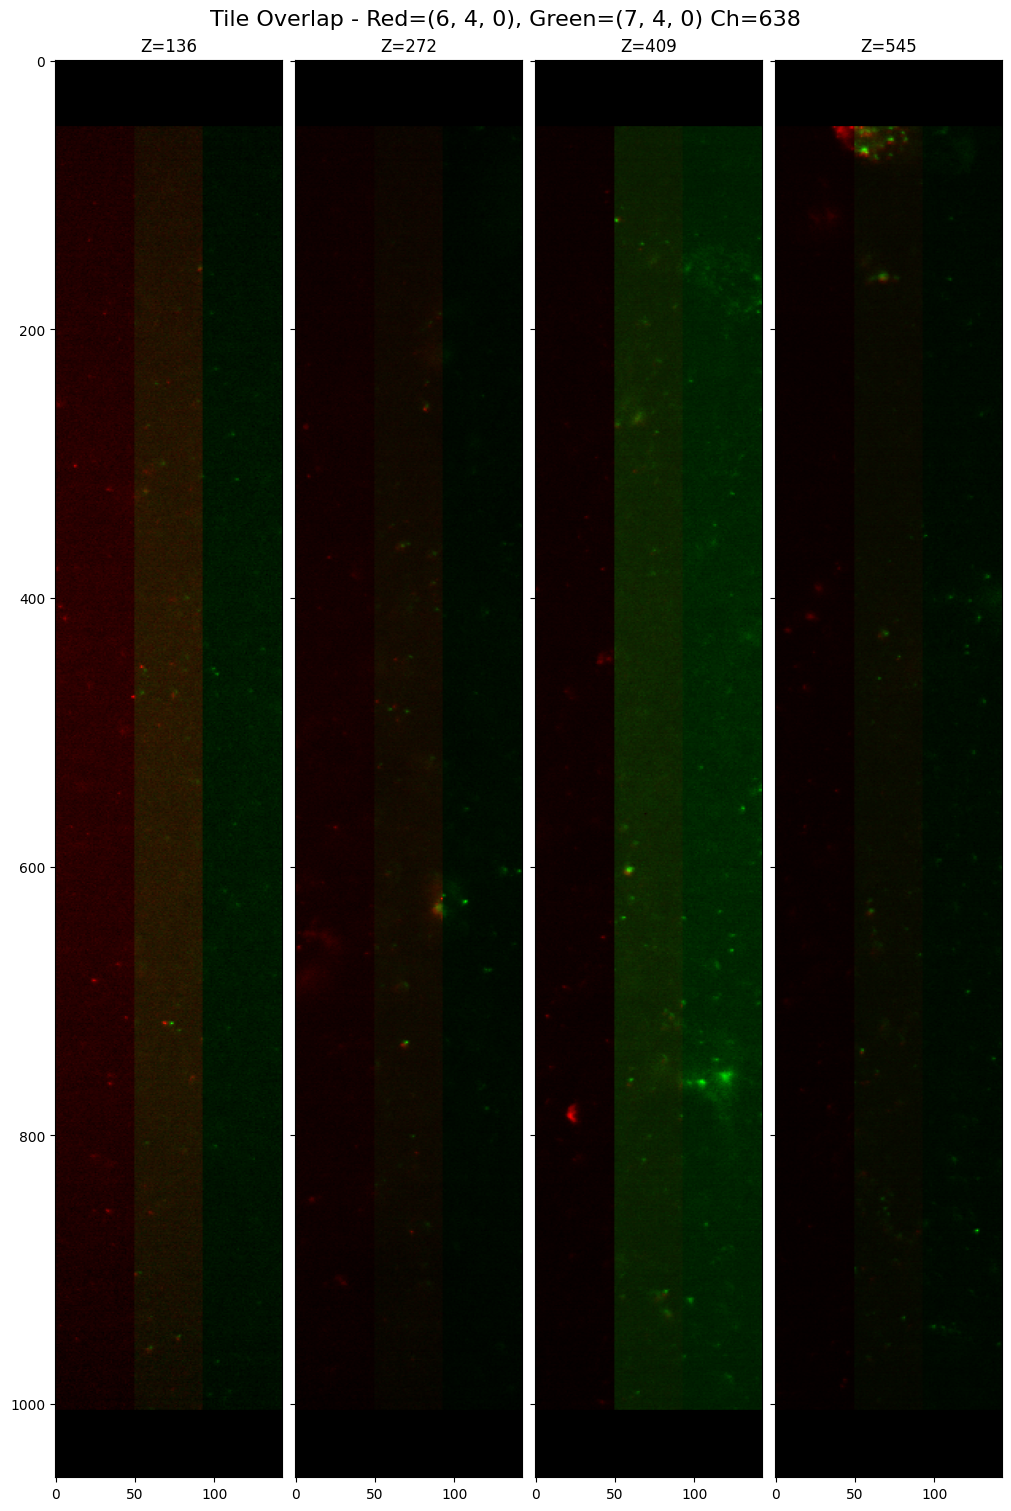

In [115]:
pair_n = 4
pyramid_level = 1

ta.figure_tile_overlap_4_slices(pairs[pair_n][0], 
                                pairs[pair_n][1],
                                stitched_xml, 
                                pyramid_level=pyramid_level,
                                channel="spots",
                                save=False,
                                output_dir=save_dir)

Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_488.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0008_Y_0003_Z_0000_ch_488.zarr at pyramid level 1 with shape (682, 955, 955)


None 10321
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_514.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_514.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0008_Y_0003_Z_0000_ch_514.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0008_Y_0003_Z_0000_ch_488.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0008_Y_0003_Z_0000_ch_514.zarr at pyramid level 1 with shape (682, 955, 955)
10321 7759.0
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_561.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_561.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0008_Y_0003_Z_0000_ch_561.zarr at pyramid level 1 with shape (682, 955, 955)
Loaded tile Tile_X_0008_Y_0003_Z_0000_ch_561.zarr at pyramid level 1 with shape (682, 955, 955)
7759.0 6282.0
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_594.zarr at pyramid level 1 with shape (682, 955, 955)
Lo

/src/aind-hcr-qc/src/aind_hcr_qc/tile_alignment.py:1241: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  output_path.mkdir(parents=True, exist_ok=True)


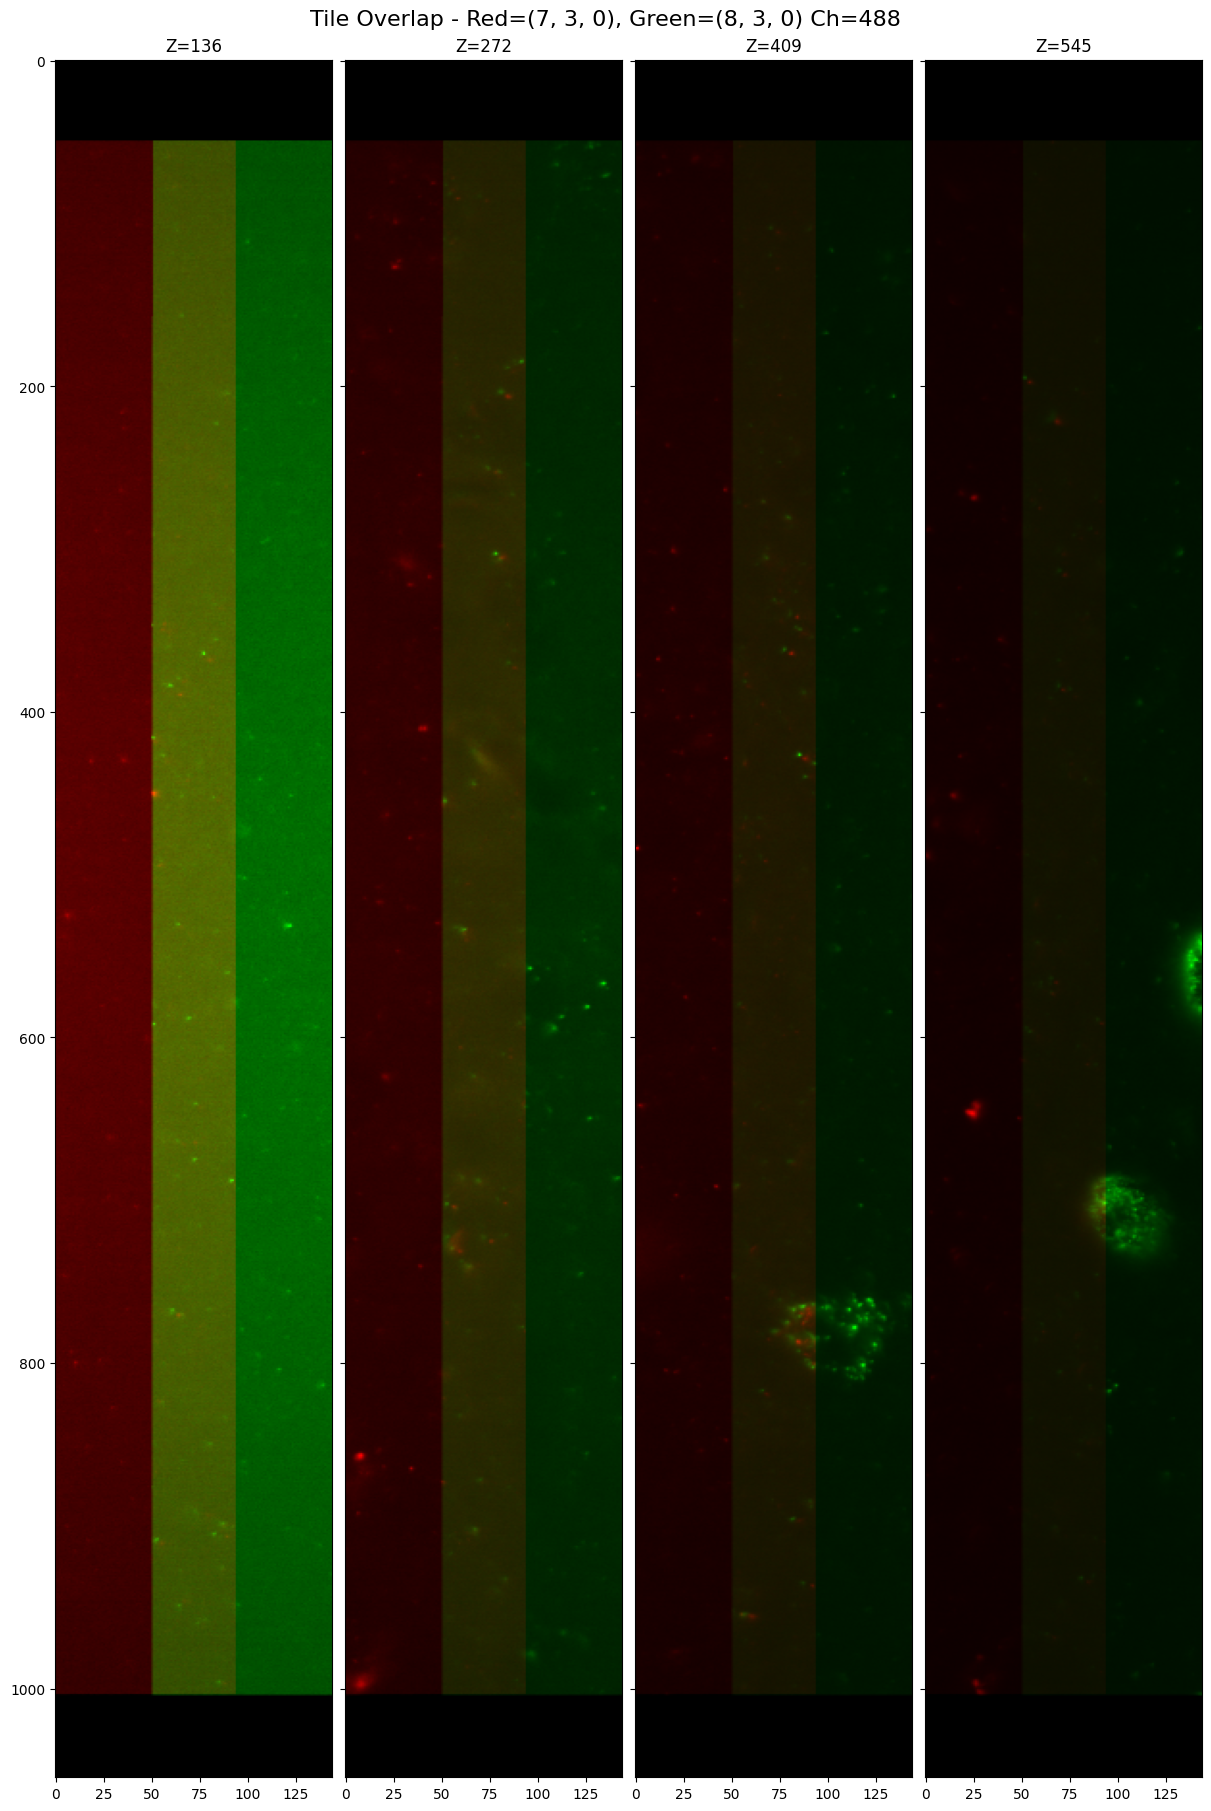

In [131]:
pair_n = 8
pyramid_level = 1

ta.figure_tile_overlap_4_slices(pairs[pair_n][0], 
                                pairs[pair_n][1],
                                stitched_xml, 
                                pyramid_level=pyramid_level,
                                channel="spots",
                                save=False,
                                output_dir=save_dir)

Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Error loading tile Tile_X_0006_Y_0003_Z_0000_ch_514.zarr or Tile_X_0007_Y_0003_Z_0000_ch_514.zarr: 'TileData' object has no attribute 'sum'
Error loading tile Tile_X_0006_Y_0003_Z_0000_ch_561.zarr or Tile_X_0007_Y_0003_Z_0000_ch_561.zarr: 'TileData' object has no attribute 'sum'
Error loading tile Tile_X_0006_Y_0003_Z_0000_ch_594.zarr or Tile_X_0007_Y_0003_Z_0000_ch_594.zarr: 'TileData' object has no attribute 'sum'
Error loading tile Tile_X_0006_Y_0003_Z_0000_ch_638.zarr or Tile_X_0007_Y_0003_Z_0000_ch_638.zarr: 'TileData' object has no attribute 'sum'
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Composite dimensions: 81x537

Placement coordinates:
Til

/src/aind-hcr-qc/src/aind_hcr_qc/tile_alignment.py:1234: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  tile2_name, ch2 = parse_tile_name(tile2.tile_name)


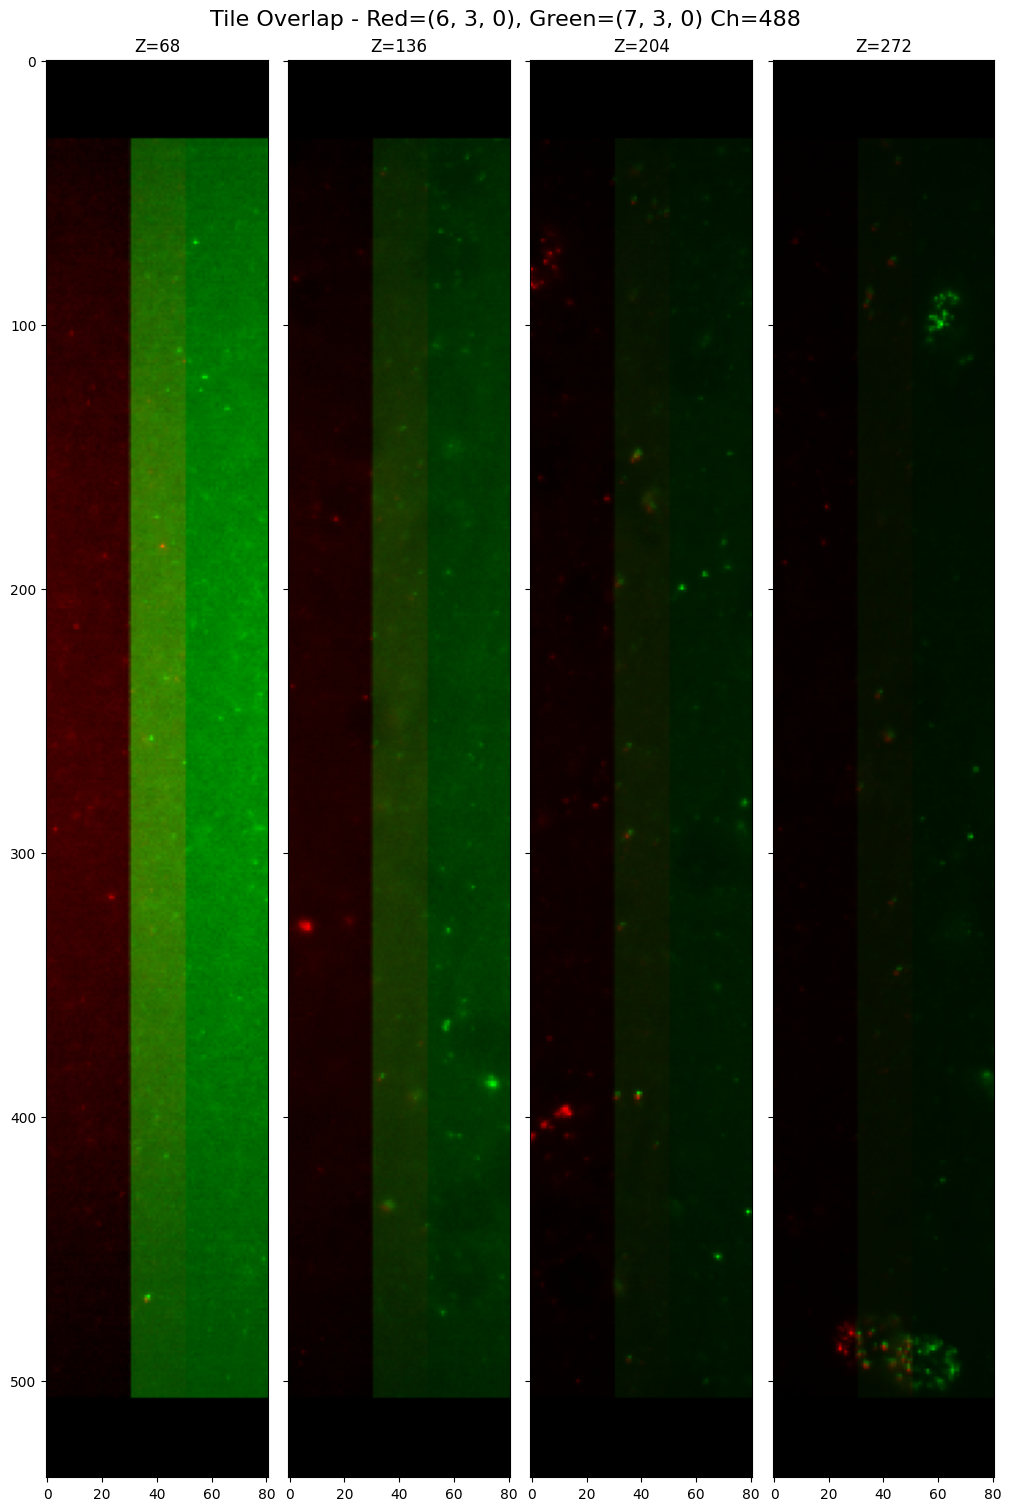

In [106]:
pair_n = 3
pyramid_level = 2

ta.figure_tile_overlap_4_slices(pairs[pair_n][0], 
                                pairs[pair_n][1],
                                stitched_xml, 
                                pyramid_level=pyramid_level,
                                channel="spots",
                                save=False,
                                output_dir=save_dir)

Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_561.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_561.zarr at pyramid level 2 with shape (341, 477, 477)
Error loading tile Tile_X_0006_Y_0003_Z_0000_ch_594.zarr or Tile_X_0007_Y_0003_Z_0000_ch_594.zarr: 'TileData' object has no attribute 'sum'
Error loading tile Tile_X_0006_Y_0003_Z_0000_ch_638.zarr or Tile_X_0007_Y_0003_Z_0000_ch_638.zarr: 'TileData' object has no attribute 'sum'
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_561.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_561.zarr at pyramid level 2 with shape (341, 477, 477)
Composite dimensions: 81x537

Placement coordinates:
Tile 1: y=30, x=0, shape=(477, 51)
Tile 2: y=30, x=30, shape=(477, 51)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_561.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_561.zarr at pyramid level 2 with shape (341, 477, 477)
Composite dimensions

/src/aind-hcr-qc/src/aind_hcr_qc/tile_alignment.py:1234: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  tile2_name, ch2 = parse_tile_name(tile2.tile_name)


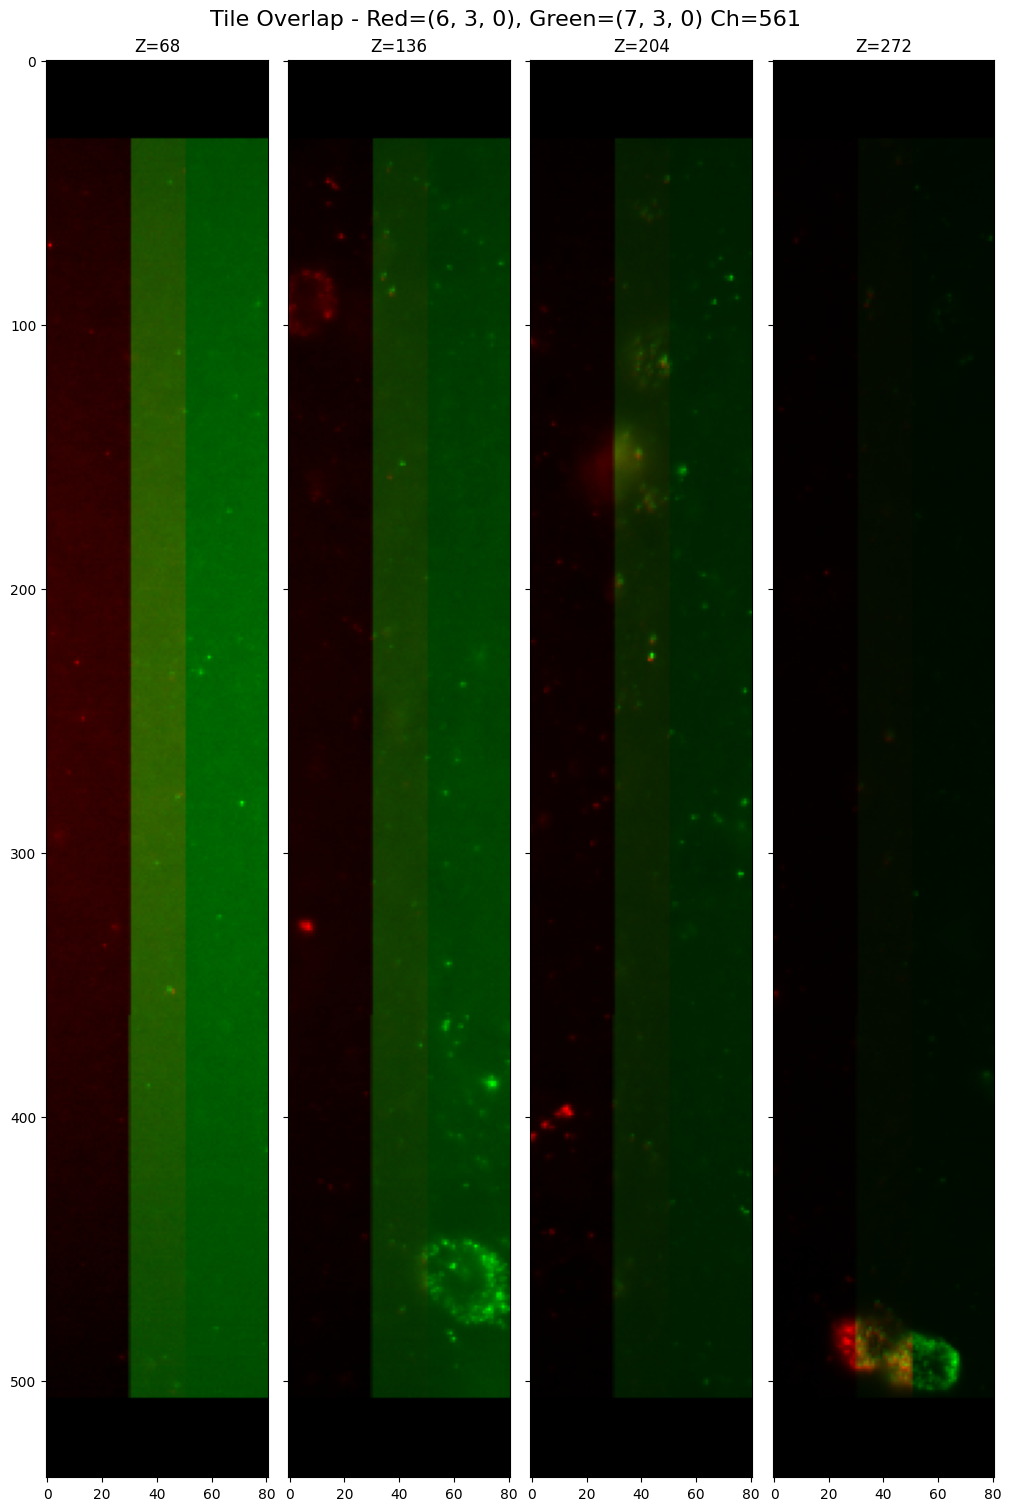

In [105]:
pair_n = 3
pyramid_level = 2

ta.figure_tile_overlap_4_slices(pairs[pair_n][0], 
                                pairs[pair_n][1],
                                stitched_xml, 
                                pyramid_level=pyramid_level,
                                channel="spots",
                                save=False,
                                output_dir=save_dir)


Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_514.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_514.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_514.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_514.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0007_Y_0003_Z_0000_ch_488.zarr at pyramid level 2 with shape (341, 477, 477)
Composite dimensions: 81x537

Placement 

/src/aind-hcr-qc/src/aind_hcr_qc/tile_alignment.py:1234: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  tile2_name, ch2 = parse_tile_name(tile2.tile_name)


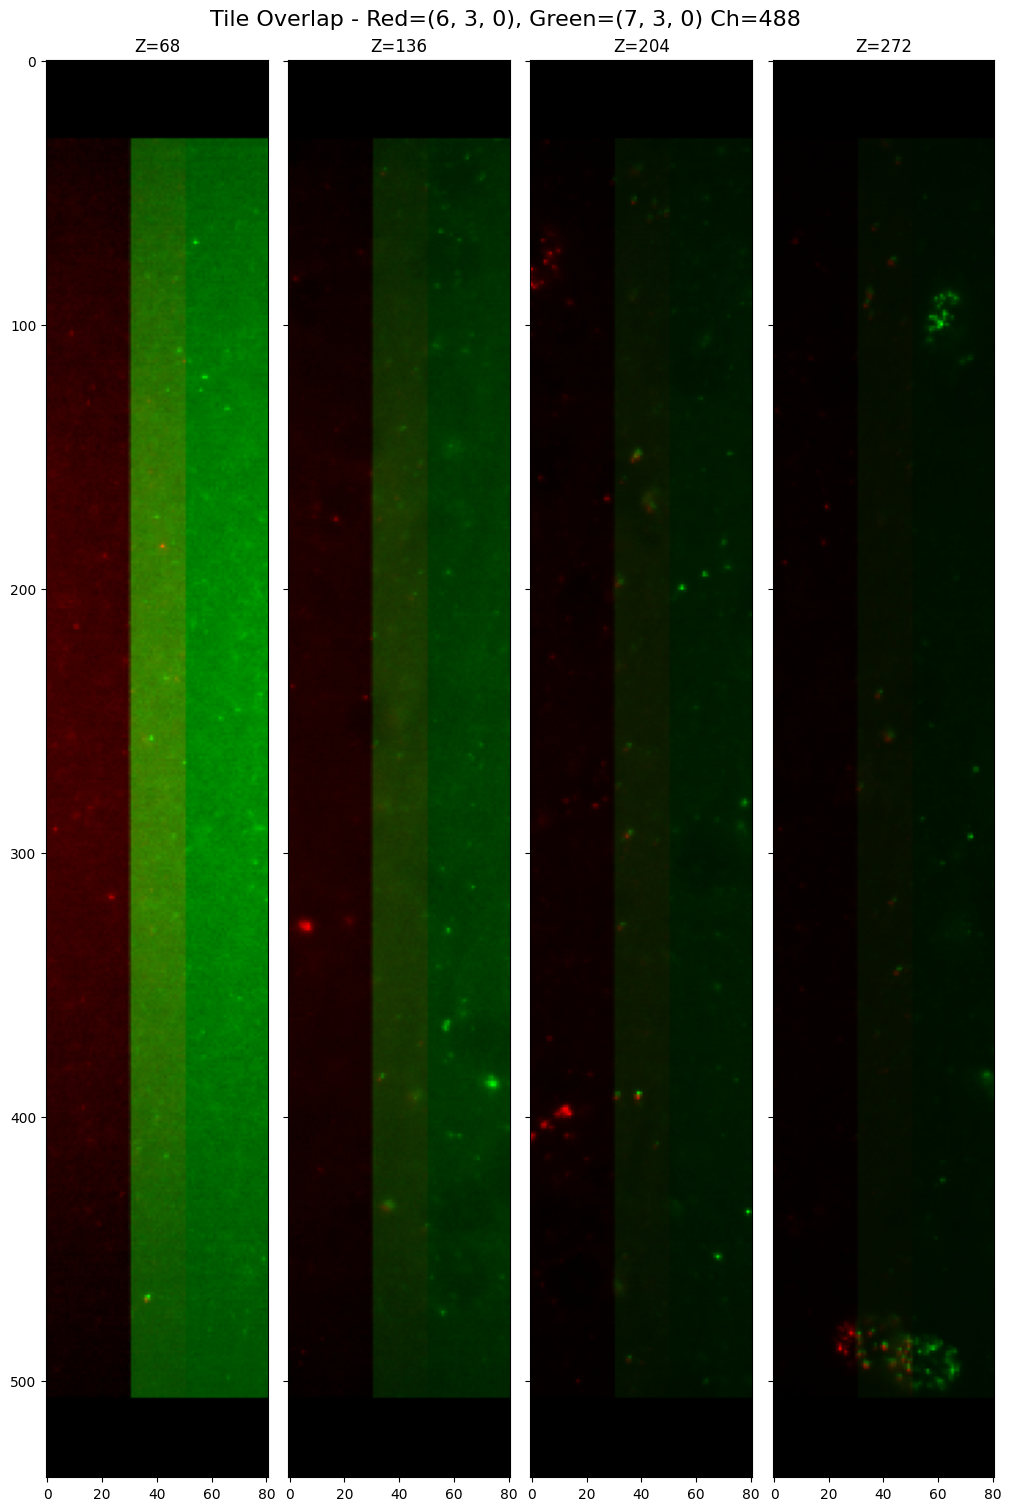

In [102]:
pair_n = 3
pyramid_level = 2

ta.figure_tile_overlap_4_slices(pairs[pair_n][0], 
                                pairs[pair_n][1],
                                stitched_xml, 
                                pyramid_level=pyramid_level,
                                channel="spots",
                                save=False,
                                output_dir=save_dir)



# Plot overlap single channel

Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Composite shape: [170 466 238]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 228   0]
Tile1 shape: (170, 238, 238), non-zero pixels: 9629480
Tile2 shape: (170, 238, 238), non-zero pixels: 9629480
Tile1 percentiles: 1% = 89.0, 99% = 847.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 877.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 228   0]
Overlap volume: 381300 voxels (2.02% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


(<aind_hcr_qc.tile_alignment.PairedTiles at 0x7f7b9033dc60>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=119'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'ZX slice at Y=233'}, xlabel='X', ylabel='Z'>,
        <Axes: title={'center': 'ZY slice at X=85'}, xlabel='Y', ylabel='Z'>],
       dtype=object))

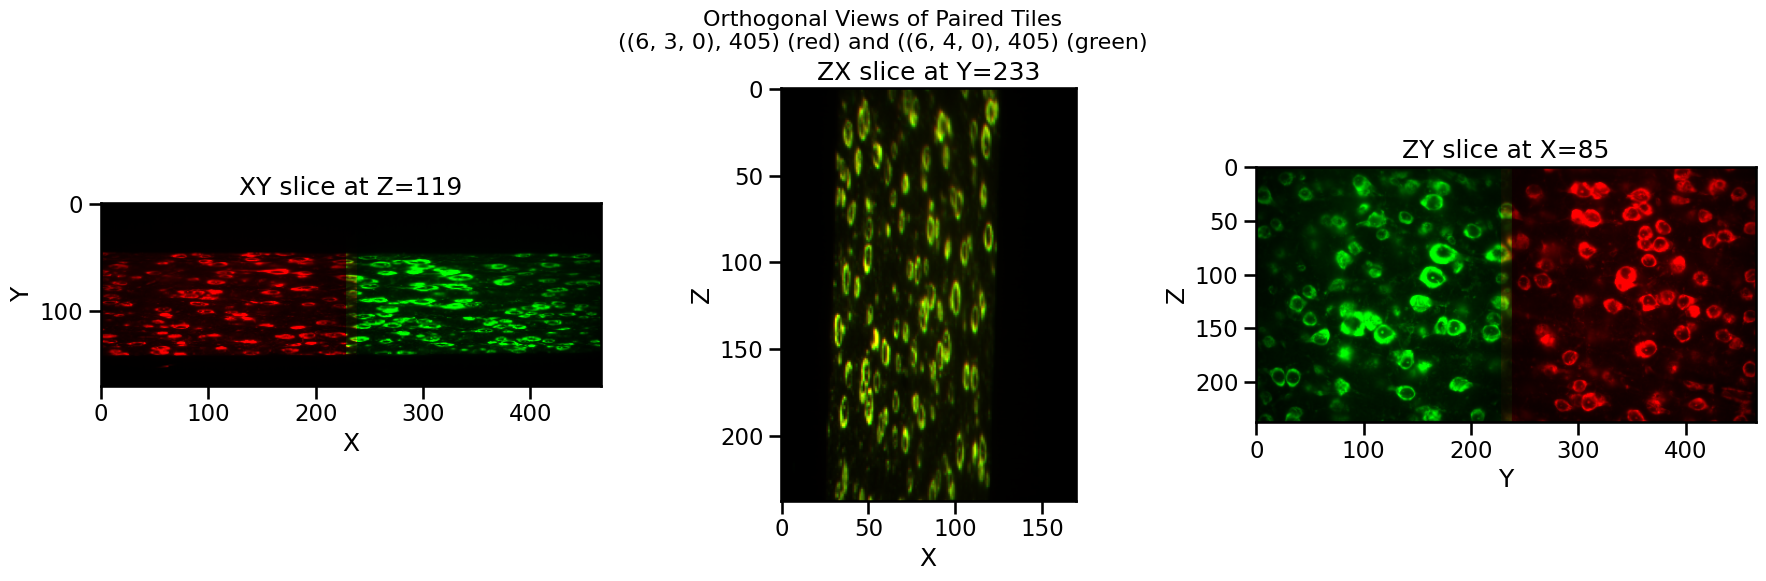

In [43]:


pair_n = 2
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
ta.visualize_paired_tiles(tile1_name, tile2_name, stitched_xml, pyramid_level=pyramid_level, overlap_only=False)

Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0004_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Composite shape: [170 466 238]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 228   0]
Tile1 shape: (170, 238, 238), non-zero pixels: 9629480
Tile2 shape: (170, 238, 238), non-zero pixels: 9629480
Tile1 percentiles: 1% = 89.0, 99% = 847.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 877.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 228   0]
Overlap volume: 381300 voxels (2.02% of composite)
Red channel (Tile1) max value in composite: 1.0
Green channel (Tile2) max value in composite: 1.0


(<aind_hcr_qc.tile_alignment.PairedTiles at 0x7f7b8a15ebf0>,
 <Figure size 1800x600 with 3 Axes>,
 array([<Axes: title={'center': 'XY slice at Z=119'}, xlabel='X', ylabel='Y'>,
        <Axes: title={'center': 'ZX slice at Y=233'}, xlabel='X', ylabel='Z'>,
        <Axes: title={'center': 'ZY slice at X=85'}, xlabel='Y', ylabel='Z'>],
       dtype=object))

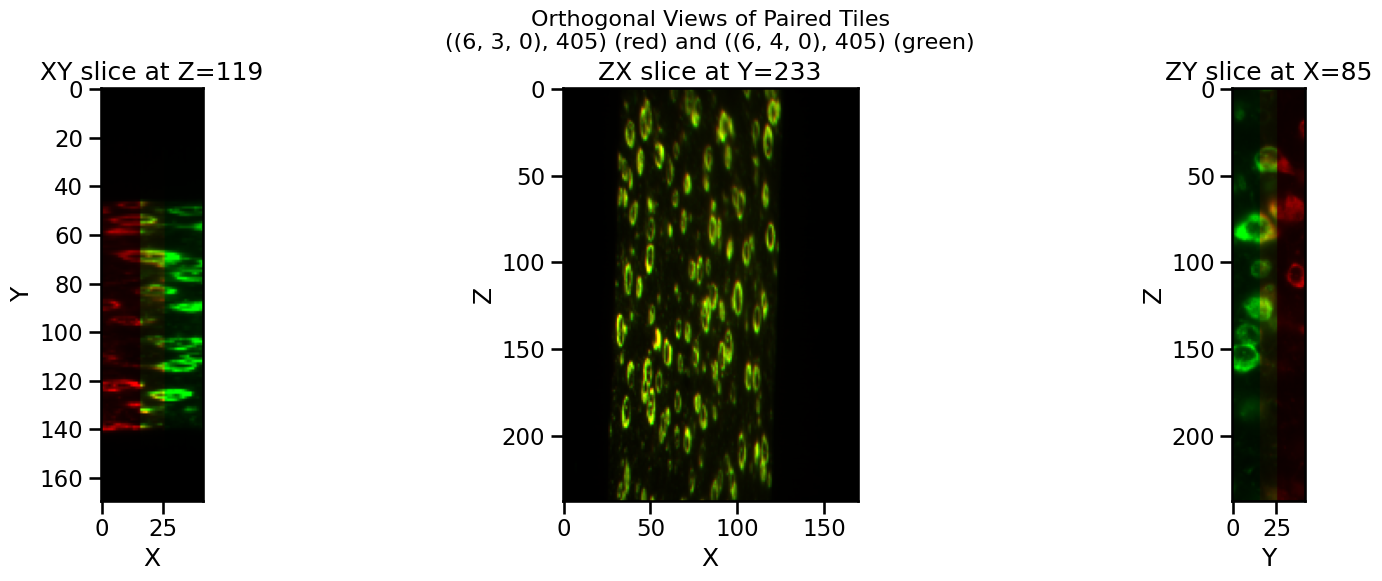

In [44]:


pair_n = 2
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3
ta.visualize_paired_tiles(tile1_name, tile2_name, stitched_xml, pyramid_level=pyramid_level, overlap_only=True)

# Plot tile overlap all channels


Channel 488
----------
Tile1: Tile_X_0006_Y_0002_Z_0000_ch_488.zarr
Tile2: Tile_X_0006_Y_0003_Z_0000_ch_488.zarr
Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_488.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_488.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_488.zarr at pyramid level 3 with shape (170, 238, 238)
Composite shape: [170 467 238]
Tile1 offset: [0 0 0]
Tile2 offset: [  0 228   0]
Tile1 shape: (170, 238, 238), non-zero pixels: 9629480
Tile2 shape: (170, 238, 238), non-zero pixels: 9629480
Tile1 percentiles: 1% = 89.0, 99% = 237.0
Tile1 normalized range: 0.0 to 1.0
Tile2 percentiles: 1% = 89.0, 99% = 140.0
Tile2 normalized range: 0.0 to 1.0
Tile1 offset in composite: [0 0 0]
Tile2 offset in composite: [  0 228   0]
Overlap volume: 384900 voxels (2.04% of composite)
Red channel (Tile1) max value 

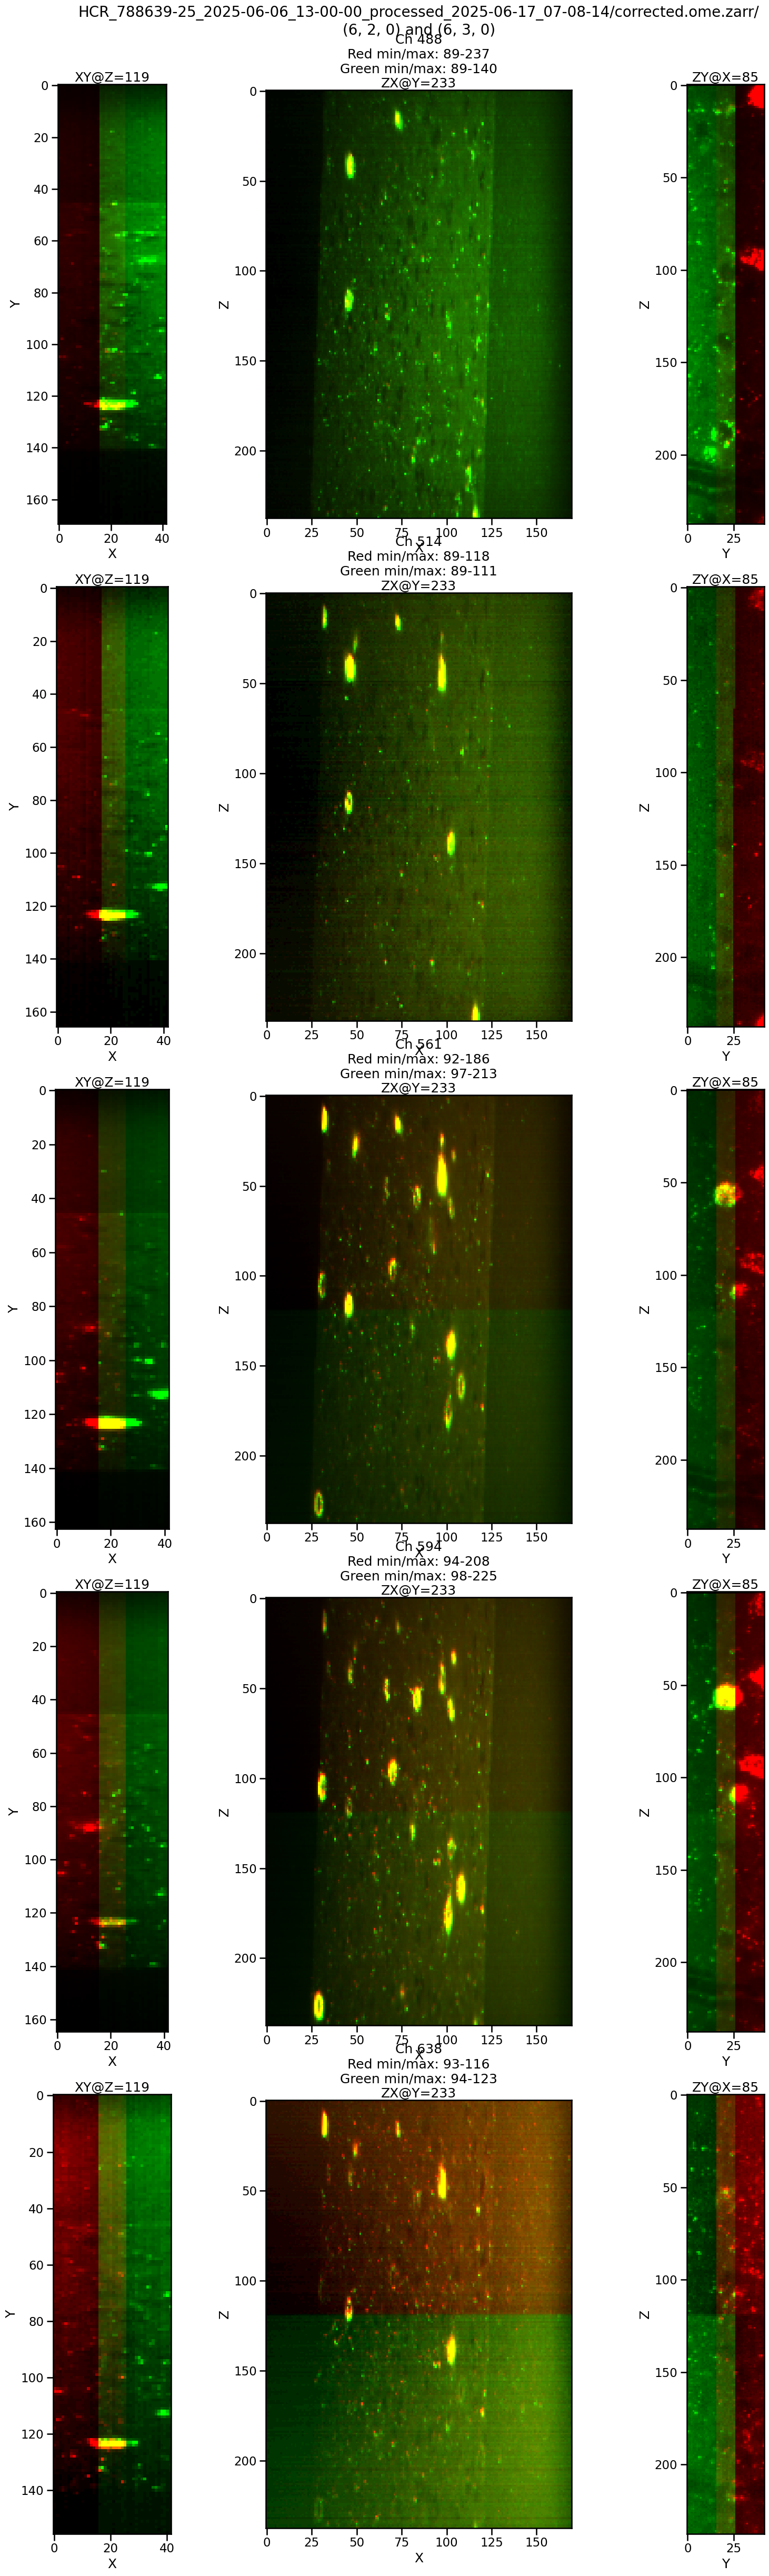

In [35]:
channels = ["488", "514","561","594","638"]
fig, axes = ta.visualize_multichannel_paired_tiles(tile1_name, 
                                                   tile2_name,
                                                   stitched_xml,
                                                   channels=channels,
                                                   pyramid_level=3, 
                                                   overlap_only=True,)

## Analyze transforms

In [28]:
stitched_xml["dataset_path"]

'HCR_788639-25_2025-06-06_13-00-00_processed_2025-06-17_07-08-14/corrected.ome.zarr/'

In [29]:
pair_n = 0
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 2

tile1 = TileData(tile_name=tile1_name, 
                bucket_name=bucket_name, 
                dataset_path=stitched_xml["dataset_path"],
                pyramid_level=pyramid_level)
tile2 = TileData(tile_name=tile2_name, 
                bucket_name=bucket_name, 
                dataset_path=stitched_xml["dataset_path"],
                pyramid_level=pyramid_level)
#transform1, transform2 = ta.get_transforms(tile1, tile2)

Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)


In [13]:
data = stitched_xml
list(data["tile_names"].values()).index(tile1_name)

data["tile_names"].keys()

dict_keys([62, 63, 64, 72, 73, 74, 82, 83, 84])

In [ ]:
list(data["tile_names"].keys())[0]

62

In [8]:
ta.get_net_transforms(stitched_xml,tile1_name)

Getting net transforms for tile: Tile_X_0006_Y_0002_Z_0000_ch_405.zarr
Available tile names: ['Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr']


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [17]:
# check transpose
tile1 = TileData(tile_name=tile2_name, 
                bucket_name=bucket_name, 
                dataset_path=stitched_xml["dataset_path"],
                pyramid_level=pyramid_level, verbose=True).transpose((2,1,0))

Loaded tile Tile_X_0007_Y_0002_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Transposed data to shape (238, 238, 170) with dimension order XYZ


In [18]:
tile1.shape

(238, 238, 170)

In [19]:
tile1.data

array([[[89, 89, 89, ..., 89, 90, 89],
        [89, 89, 90, ..., 89, 89, 89],
        [91, 91, 91, ..., 91, 91, 91],
        ...,
        [89, 90, 89, ..., 90, 89, 89],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[89, 90, 90, ..., 90, 90, 90],
        [90, 89, 90, ..., 90, 90, 89],
        [90, 90, 90, ..., 91, 90, 91],
        ...,
        [90, 90, 90, ..., 90, 89, 90],
        [89, 89, 89, ..., 89, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        ...,
        [90, 89, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       ...,

       [[89, 90, 90, ..., 90, 90, 90],
        [91, 91, 90, ..., 90, 90, 91],
        [90, 90, 90, ..., 90, 91, 90],
        ...,
        [91, 90, 91, ..., 91, 91, 91],
        [91, 91, 90, ..., 91, 91, 91],
        [91, 91, 91, ..., 90, 91

In [31]:
tile1_t = tile1.transpose((2,1,0))

In [32]:
print(tile1_t.shape)
tile1_t.data

(238, 238, 170)


array([[[89, 89, 89, ..., 89, 90, 89],
        [89, 89, 90, ..., 89, 89, 89],
        [91, 91, 91, ..., 91, 91, 91],
        ...,
        [89, 90, 89, ..., 90, 89, 89],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[89, 90, 90, ..., 90, 90, 90],
        [90, 89, 90, ..., 90, 90, 89],
        [90, 90, 90, ..., 91, 90, 91],
        ...,
        [90, 90, 90, ..., 90, 89, 90],
        [89, 89, 89, ..., 89, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        ...,
        [90, 89, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       ...,

       [[89, 90, 90, ..., 90, 90, 90],
        [91, 91, 90, ..., 90, 90, 91],
        [90, 90, 90, ..., 90, 91, 90],
        ...,
        [91, 90, 91, ..., 91, 91, 91],
        [91, 91, 90, ..., 91, 91, 91],
        [91, 91, 91, ..., 90, 91